# Working with 3D Gathers

Gathers or pre-stack data are common in seismic interpretation and processing. In this example we will load gather data by finding and specifying the offset byte location. Learn different ways to plot and select offset data. As well as perform a simple mute and trace stack to reduce the offset dimension.

In [1]:
import pathlib
from IPython.display import display
import pandas as pd
import xarray as xr
import numpy as np
from segysak.segy import segy_loader, segy_header_scan
import matplotlib.pyplot as plt

This example uses a subset of the Penobscot 3D with data exported from the OpendTect [project](https://terranubis.com/datainfo/Penobscot).

First we scan the data to determine which byte locations contain the relevant information. We will need to provide a byte location for the offset variable so a 4th dimension can be created when loaded the data.

In [2]:
segy_file = pathlib.Path("data/3D_gathers_pstm_nmo.sgy")
with pd.option_context("display.max_rows", 100):
    display(segy_header_scan(segy_file))

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

100%|██████████| 1.00k/1.00k [00:00<00:00, 21.0k traces/s]

byte_loc   count          mean  \
TRACE_SEQUENCE_LINE                            1  1000.0  2.797410e+02   
TRACE_SEQUENCE_FILE                            5  1000.0  3.055600e+01   
FieldRecord                                    9  1000.0  1.290329e+03   
TraceNumber                                   13  1000.0  0.000000e+00   
EnergySourcePoint                             17  1000.0  0.000000e+00   
CDP                                           21  1000.0  1.154085e+03   
CDP_TRACE                                     25  1000.0  0.000000e+00   
TraceIdentificationCode                       29  1000.0  1.000000e+00   
NSummedTraces                                 31  1000.0  0.000000e+00   
NStackedTraces                                33  1000.0  0.000000e+00   
DataUse                                       35  1000.0  1.000000e+00   
offset                                        37  1000.0  1.652800e+03   
ReceiverGroupElevation                        41  1000.0  0.000000e+00   
SourceSurfaceElevation                        45  1000.0  0.000000e+00   
SourceDepth                                   49  1000.0  0.000000e+00   
ReceiverDatumElevation                        53  1000.0  0.000000e+00   
SourceDatumElevation                          57  1000.0  0.000000e+00   
SourceWaterDepth                              61  1000.0  0.000000e+00   
GroupWaterDepth                               65  1000.0  0.000000e+00   
ElevationScalar                               69  1000.0  0.000000e+00   
SourceGroupScalar                             71  1000.0 -1.000000e+01   
SourceX                                       73  1000.0  7.337142e+06   
SourceY                                       77  1000.0  4.895109e+07   
GroupX                                        81  1000.0  0.000000e+00   
GroupY                                        85  1000.0  0.000000e+00   
CoordinateUnits                               89  1000.0  1.000000e+00   
WeatheringVelocity                            91  1000.0  0.000000e+00   
SubWeatheringVelocity                         93  1000.0  0.000000e+00   
SourceUpholeTime                              95  1000.0  0.000000e+00   
GroupUpholeTime                               97  1000.0  0.000000e+00   
SourceStaticCorrection                        99  1000.0  0.000000e+00   
GroupStaticCorrection                        101  1000.0  0.000000e+00   
TotalStaticApplied                           103  1000.0  0.000000e+00   
LagTimeA                                     105  1000.0  0.000000e+00   
LagTimeB                                     107  1000.0  0.000000e+00   
DelayRecordingTime                           109  1000.0  0.000000e+00   
MuteTimeStart                                111  1000.0  0.000000e+00   
MuteTimeEND                                  113  1000.0  0.000000e+00   
TRACE_SAMPLE_COUNT                           115  1000.0  7.510000e+02   
TRACE_SAMPLE_INTERVAL                        117  1000.0  4.000000e+03   
GainType                                     119  1000.0  0.000000e+00   
InstrumentGainConstant                       121  1000.0  0.000000e+00   
InstrumentInitialGain                        123  1000.0  0.000000e+00   
Correlated                                   125  1000.0  0.000000e+00   
SweepFrequencyStart                          127  1000.0  0.000000e+00   
SweepFrequencyEnd                            129  1000.0  0.000000e+00   
SweepLength                                  131  1000.0  0.000000e+00   
SweepType                                    133  1000.0  0.000000e+00   
SweepTraceTaperLengthStart                   135  1000.0  0.000000e+00   
SweepTraceTaperLengthEnd                     137  1000.0  0.000000e+00   
TaperType                                    139  1000.0  0.000000e+00   
AliasFilterFrequency                         141  1000.0  0.000000e+00   
AliasFilterSlope                             143  1000.0  0.000000e+00   
NotchFilterFrequency                        

In [3]:
penobscot_3d_gath = segy_loader(
    segy_file, iline=189, xline=193, cdp_x=181, cdp_y=185, offset=37
)

  0%|          | 0.00/7.38k [00:00<?, ? traces/s]

100%|██████████| 7.38k/7.38k [00:00<00:00, 21.4k traces/s]

100%|██████████| 7.38k/7.38k [00:00<00:00, 21.4k traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/7.38k [00:00<?, ? traces/s]

Converting SEGY:   7%|▋         | 512/7.38k [00:00<00:01, 5.12k traces/s]

Converting SEGY:  14%|█▍        | 1.05k/7.38k [00:00<00:01, 5.29k traces/s]

Converting SEGY:  22%|██▏       | 1.60k/7.38k [00:00<00:01, 5.39k traces/s]

Converting SEGY:  29%|██▉       | 2.16k/7.38k [00:00<00:00, 5.43k traces/s]

Converting SEGY:  37%|███▋      | 2.71k/7.38k [00:00<00:00, 5.47k traces/s]

Converting SEGY:  44%|████▍     | 3.27k/7.38k [00:00<00:00, 5.50k traces/s]

Converting SEGY:  52%|█████▏    | 3.82k/7.38k [00:00<00:00, 5.51k traces/s]

Converting SEGY:  59%|█████▉    | 4.37k/7.38k [00:00<00:00, 5.50k traces/s]

Converting SEGY:  67%|██████▋   | 4.92k/7.38k [00:00<00:00, 5.48k traces/s]

Converting SEGY:  74%|███████▍  | 5.47k/7.38k [00:01<00:00, 5.48k traces/s]

Converting SEGY:  82%|████████▏ | 6.02k/7.38k [00:01<00:00, 5.48k traces/s]

Converting SEGY:  89%|████████▉ | 6.57k/7.38k [00:01<00:00, 5.50k traces/s]

Converting SEGY:  97%|█████████▋| 7.13k/7.38k [00:01<00:00, 5.52k traces/s]

Converting SEGY: 100%|██████████| 7.38k/7.38k [00:01<00:00, 5.48k traces/s]

Note that the loaded Dataset has four dimensions with the additional dimension labeled offset. There are 61 offsets in this dataset or 61 traces per inline and xline location.

In [4]:
display(penobscot_3d_gath)
print(penobscot_3d_gath.offset.values)

<xarray.Dataset> Size: 22MB
Dimensions:  (iline: 11, xline: 11, twt: 751, offset: 61)
Coordinates:
  * iline    (iline) uint16 22B 1290 1291 1292 1293 1294 ... 1297 1298 1299 1300
  * xline    (xline) uint16 22B 1150 1151 1152 1153 1154 ... 1157 1158 1159 1160
  * twt      (twt) float64 6kB 0.0 4.0 8.0 12.0 ... 2.992e+03 2.996e+03 3e+03
  * offset   (offset) uint16 122B 175 225 275 325 375 ... 3025 3075 3125 3175
    cdp_x    (iline, xline, offset) float32 30kB 7.336e+05 ... 7.338e+05
    cdp_y    (iline, xline, offset) float32 30kB 4.895e+06 ... 4.895e+06
Data variables:
    data     (iline, xline, twt, offset) float32 22MB 0.0 0.0 ... 670.1
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01\nC02\nC03\nC04\nC05\nC06\nC07  Positions accordi...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         3D_gathers_pstm_nmo.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-4084.319948142755, -3961.308399237772, -1082.87965...
    coord_scalar:        -10.0

[ 175  225  275  325  375  425  475  525  575  625  675  725  775  825
  875  925  975 1025 1075 1125 1175 1225 1275 1325 1375 1425 1475 1525
 1575 1625 1675 1725 1775 1825 1875 1925 1975 2025 2075 2125 2175 2225
 2275 2325 2375 2425 2475 2525 2575 2625 2675 2725 2775 2825 2875 2925
 2975 3025 3075 3125 3175]


Lets check that the data looks OK for a couple of offsets. We've only got a small dataset of 11x11 traces so the seismic will look at little odd at this scale.

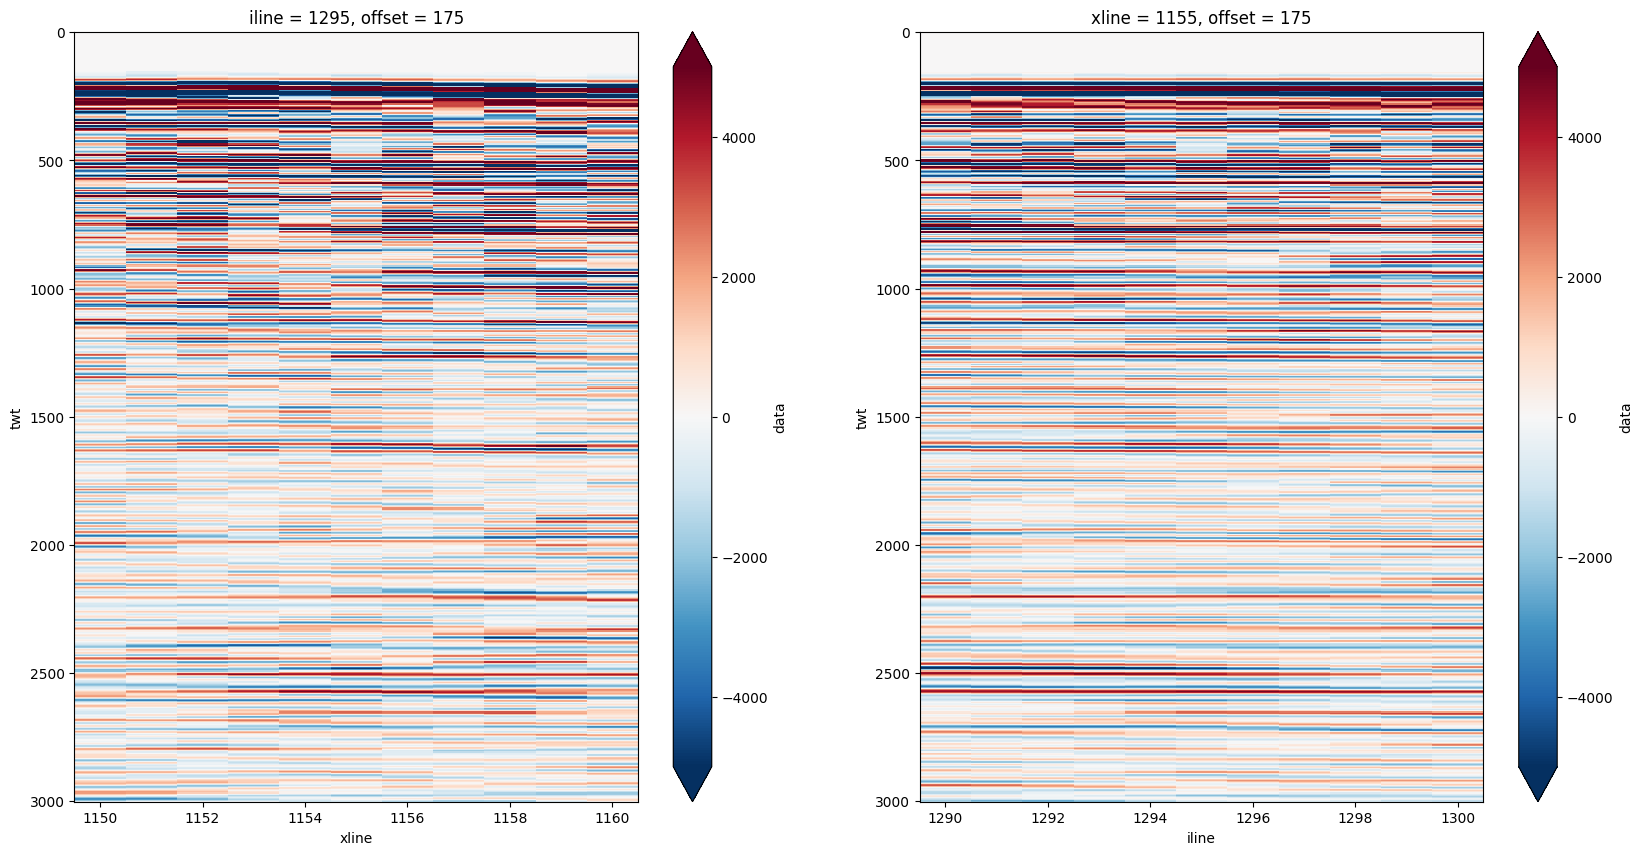

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

penobscot_3d_gath.isel(iline=5, offset=0).data.T.plot(
    yincrease=False, ax=axs[0], vmax=5000
)
penobscot_3d_gath.isel(xline=5, offset=0).data.T.plot(
    yincrease=False, ax=axs[1], vmax=5000
)

## Plotting Gathers Sequentially

Plotting of gathers is often done in a stacked way, displaying sequential gathers along a common dimension, usually inline or crossline. Xarray provides the `stack` method which can be used to stack labelled dimensions together.

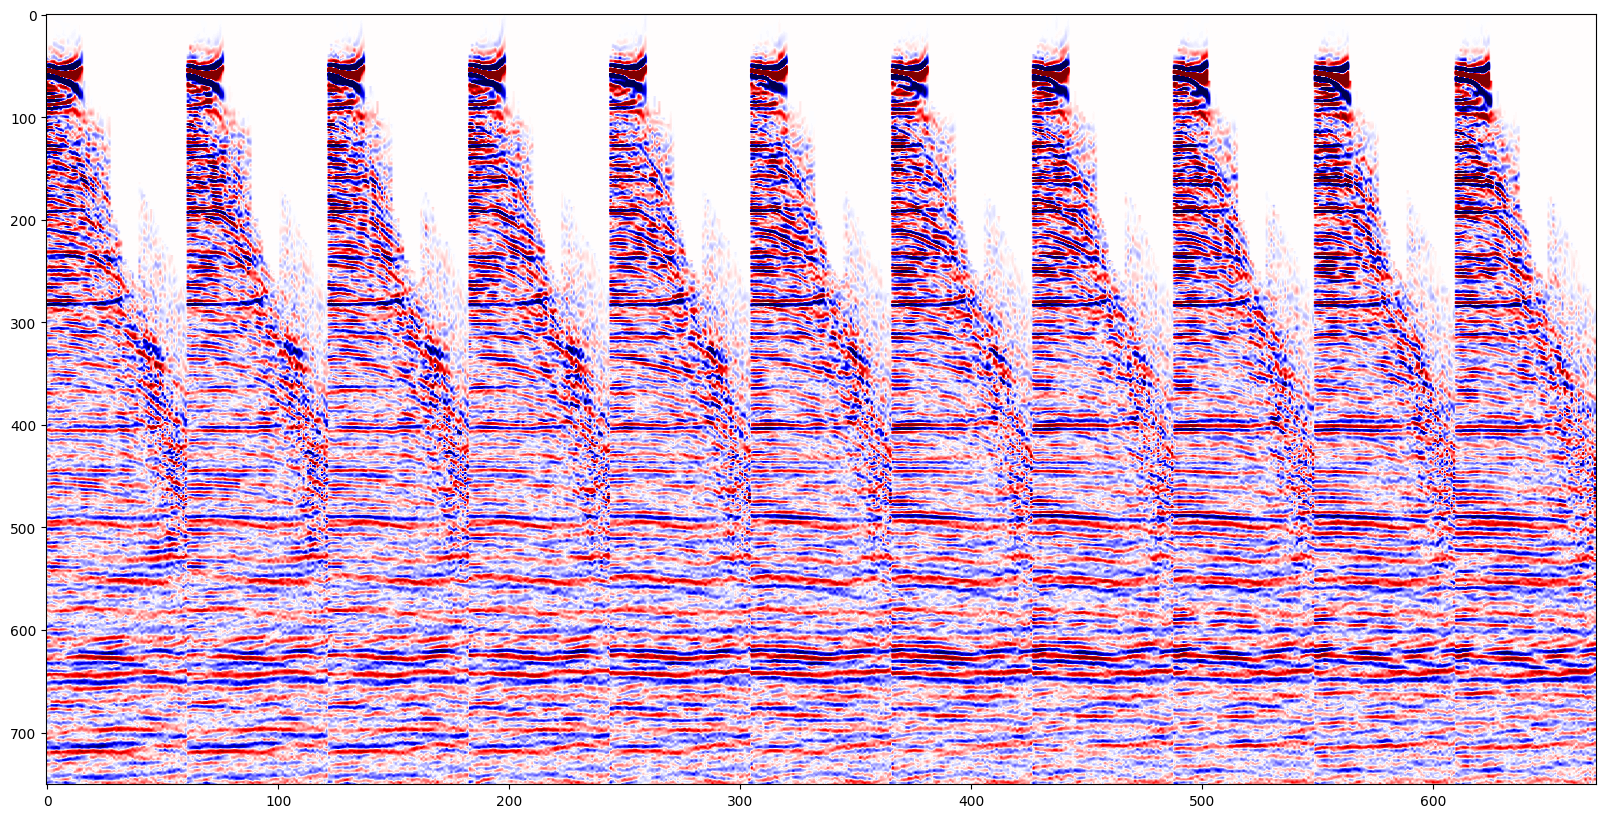

In [6]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.imshow(
    penobscot_3d_gath.isel(iline=0)
    .data.stack(stacked_offset=("xline", "offset"))
    .values,
    vmin=-5000,
    vmax=5000,
    cmap="seismic",
    aspect="auto",
)

One can easily create a common offset stack by reversing the stacked dimension arguments `"offset"` and `"xline"`.

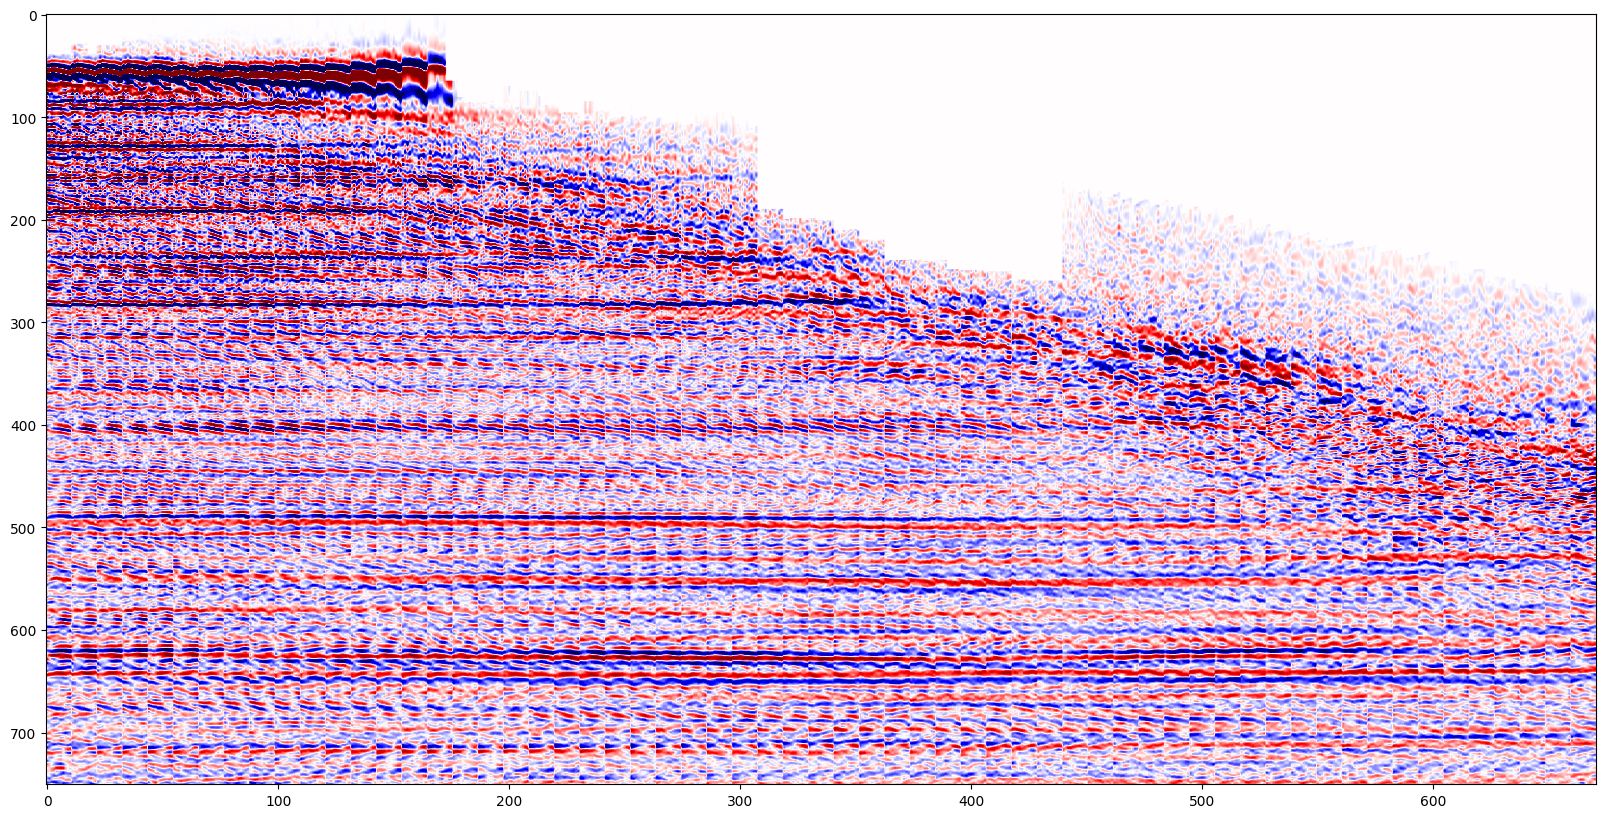

In [7]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.imshow(
    penobscot_3d_gath.isel(iline=0)
    .data.stack(stacked_offset=("offset", "xline"))
    .values,
    vmin=-5000,
    vmax=5000,
    cmap="seismic",
    aspect="auto",
)

## Arbitrary line extraction on Gathers

Arbitrary line slicing of gathers based upon coordinates is also possible. Lets create a line that crosses the 3D.

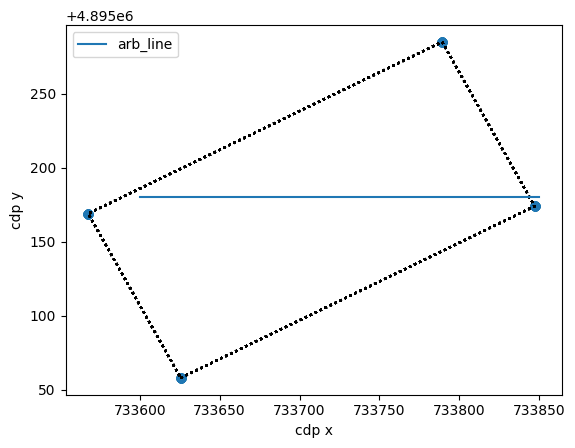

In [8]:
arb_line = np.array([(733600, 733850), (4895180.0, 4895180.0)])

ax = penobscot_3d_gath.seis.plot_bounds()
ax.plot(arb_line[0, :], arb_line[1, :], label="arb_line")
plt.legend()

Here we need to think carefully about the `bin_spacing_hint`. We also don't want to interpolate the gathers, so we use `xysel_method="nearest"`.

In [9]:
penobscot_3d_gath_arb = penobscot_3d_gath.seis.interp_line(
    arb_line[0, :], arb_line[1, :], bin_spacing_hint=30, xysel_method="nearest"
)

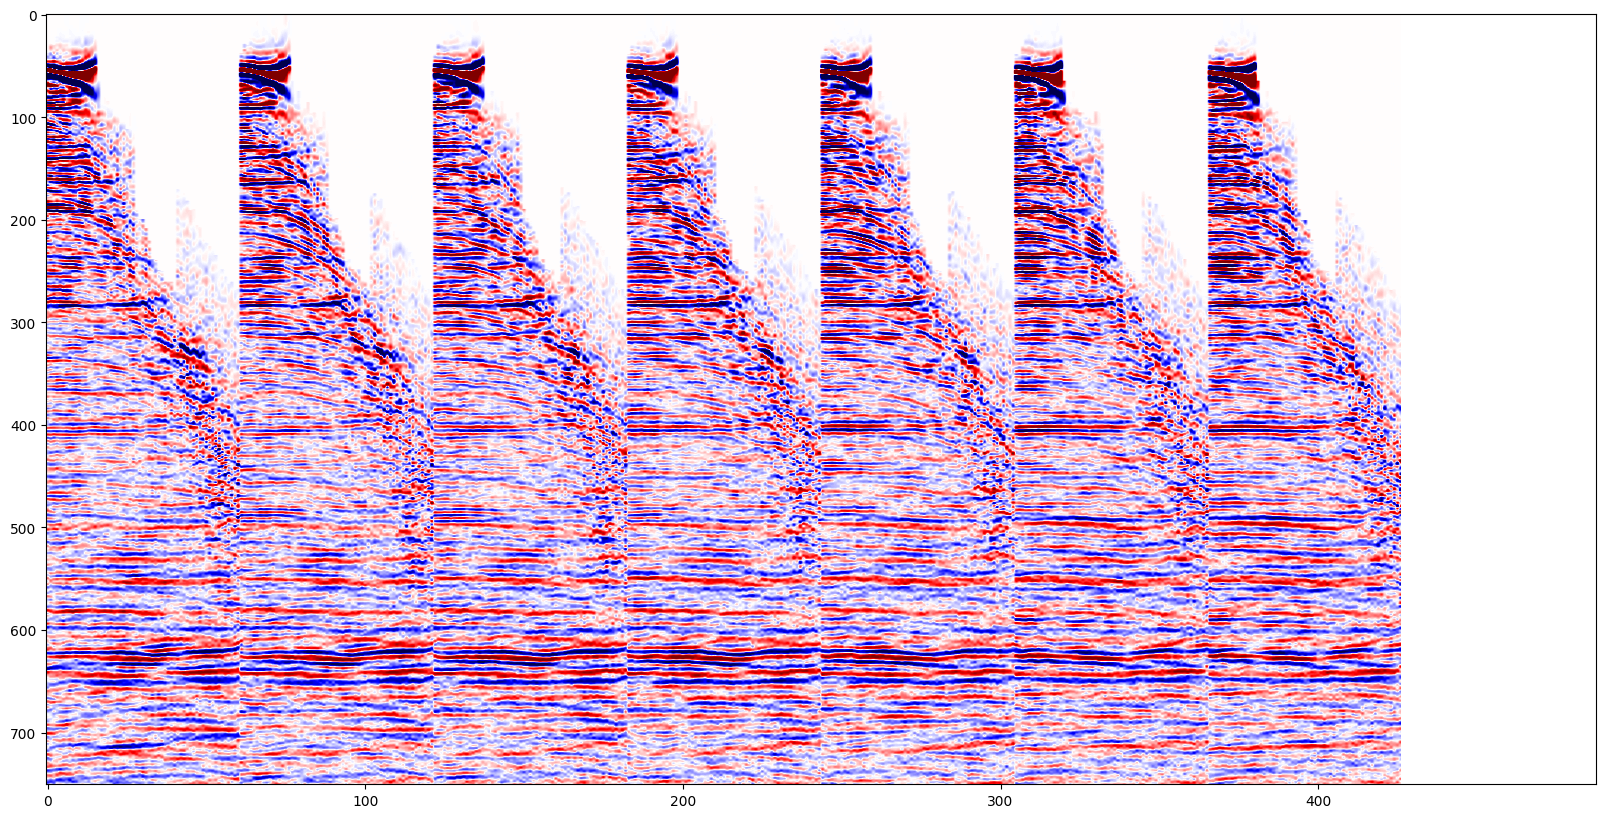

In [10]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.imshow(
    penobscot_3d_gath_arb.data.stack(
        stacked_offset=(
            "cdp",
            "offset",
        )
    ).values,
    vmin=-5000,
    vmax=5000,
    cmap="seismic",
    aspect="auto",
)

## Muting and Stacking Gathers

Using one of our gathers let's define a mute function before we stack the data.

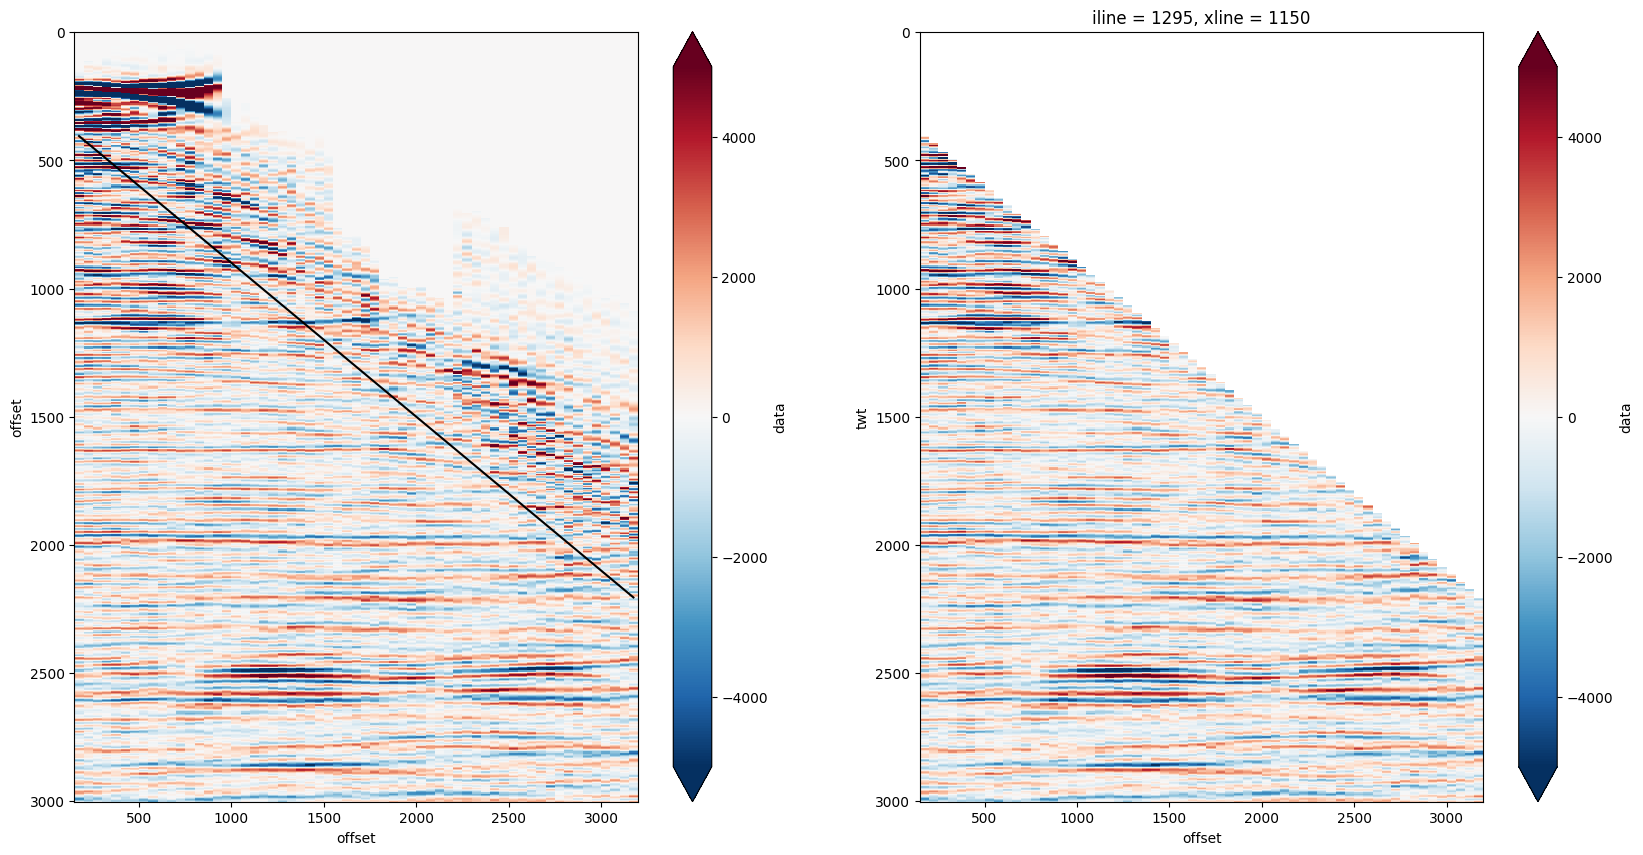

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

penobscot_3d_gath.isel(iline=5, xline=0).data.plot(
    yincrease=False, ax=axs[0], vmax=5000
)

# the mute relates the offset to an expected twt, let's just use a linear mute for this example
mute = penobscot_3d_gath.offset * 0.6 + 300
# and then we can plot it up
mute.plot(ax=axs[0], color="k")
# apply the mute to the volume
penobscot_3d_gath_muted = penobscot_3d_gath.where(penobscot_3d_gath.twt > mute)

# muted
penobscot_3d_gath_muted.isel(iline=5, xline=0).data.plot(
    yincrease=False, ax=axs[1], vmax=5000
)

Stacking is the process of averaging the gathers for constant time to create a single trace per inline and crossline location.

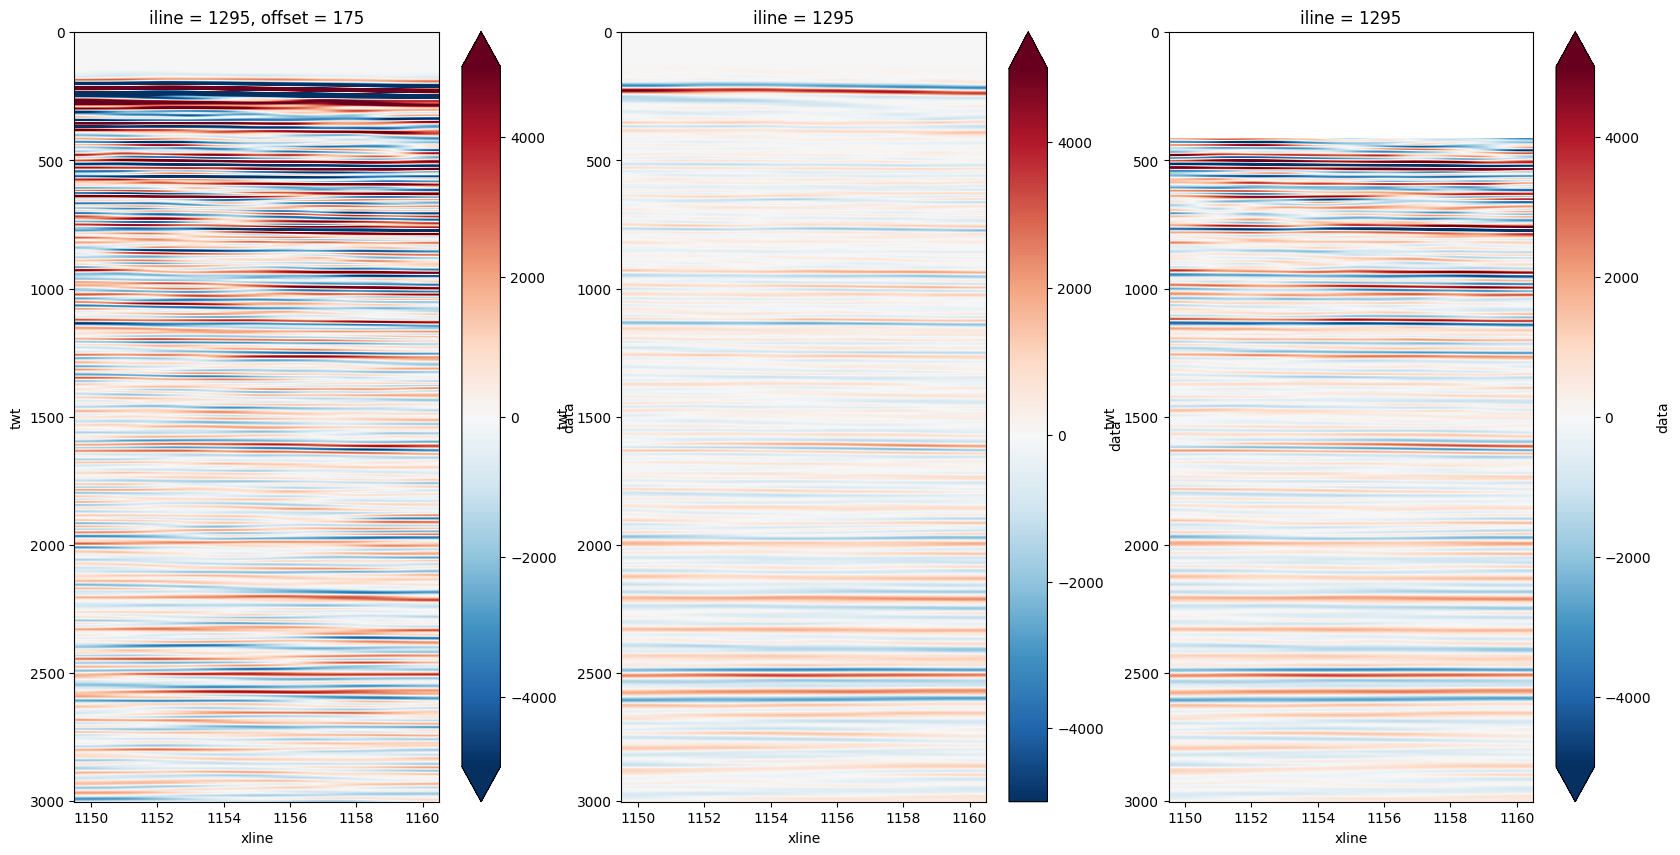

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

plot_kwargs = dict(vmax=5000, interpolation="bicubic", yincrease=False)

# compare with the zero offset trace and use imshow for interpolation
penobscot_3d_gath.isel(iline=5, offset=0).data.T.plot.imshow(ax=axs[0], **plot_kwargs)

# stack the no mute data
penobscot_3d_gath.isel(iline=5).data.mean("offset").T.plot.imshow(
    ax=axs[1], **plot_kwargs
)

# stack the muted data
penobscot_3d_gath_muted.isel(iline=5).data.mean("offset").T.plot.imshow(
    ax=axs[2], **plot_kwargs
)

In [13]:
!pip list

Package                        Version           Editable project location
------------------------------ ----------------- ---------------------------------
addict                         2.4.0
anyio                          4.3.0
argon2-cffi                    23.1.0
argon2-cffi-bindings           21.2.0
arrow                          1.3.0
asttokens                      2.4.1
async-lru                      2.0.4
attrs                          23.2.0
Babel                          2.14.0
beautifulsoup4                 4.12.3
bleach                         6.1.0
bracex                         2.4
certifi                        2024.2.2
cffi                           1.16.0
charset-normalizer             3.3.2
click                          8.1.7
cloudpickle                    3.0.0
colorama                       0.4.6
comm                           0.2.2
contourpy                      1.2.1
cycler                         0.12.1
dask                           2024.4.2
debugpy          

numpy                          1.26.4
overrides                      7.7.0
packaging                      24.0
paginate                       0.5.6
pandas                         2.2.2
pandocfilters                  1.5.1
parso                          0.8.4
partd                          1.4.1
pathspec                       0.12.1
pexpect                        4.9.0
pillow                         10.3.0
pip                            24.0
platformdirs                   4.2.1
pooch                          1.8.1
prometheus_client              0.20.0
prompt-toolkit                 3.0.43
psutil                         5.9.8
ptyprocess                     0.7.0
pure-eval                      0.2.2
pycparser                      2.22
Pygments                       2.17.2
pymdown-extensions             10.8.1
pyparsing                      3.1.2
pyshp                          2.3.1
python-dateutil                2.9.0.post0
python-json-logger             2.0.7
pytz                        